# Libraries


In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from frameExtraction import FrameExtraction
from heatmapGeneration import HeatmapGeneration
import visualization
from masks import Mask
import torch
import FILE_PATHS

# Paths


In [2]:
videos_csv = f"{FILE_PATHS.ECHONET}/VolumeTracings.csv"
images_csv = f"{FILE_PATHS.ECHONET}/images_info.csv"
images_path = FILE_PATHS.IMAGES
videos_path = FILE_PATHS.VIDEOS
masks_path = FILE_PATHS.MASKS
heatmaps_path = FILE_PATHS.HEATMAPS

## Create data directories

In [3]:
folders = [
    videos_path,
    images_path,
    masks_path,
    f"{heatmaps_path}/gaussian",
    f"{heatmaps_path}/euclidean",
]

for folder in folders:
    if not os.path.exists(folder):
        os.makedirs(folder)

# Save labeled frames


In [4]:
video_info = pd.read_csv(videos_csv)
video_info.head()

,FileName,X1,Y1,X2,Y2,Frame
0,0X100009310A3BD7FC.avi,51.260417,15.348958,64.932292,69.125000,46
1,0X100009310A3BD7FC.avi,50.037611,17.167841,53.367222,16.321330,46
2,0X100009310A3BD7FC.avi,49.157378,20.407629,57.090549,18.390722,46
3,0X100009310A3BD7FC.avi,48.538173,23.581055,59.997339,20.667707,46
4,0X100009310A3BD7FC.avi,47.918968,26.754480,62.904129,22.944693,46


The FrameExtraction class simply extracts specific frames based on 'VolumeTracings.cvs' and save a .csv with all the landmarks or an specific number of them, it depends of 'num_landmarks' param.


In [5]:
extraction = FrameExtraction(video_info=video_info)
extraction.save_images()

¡Extraction Done!
Path images:  ../EchoNet-Dynamic/data/images
Path df:  ../EchoNet-Dynamic/images_info.csv


In [6]:
frame_info = pd.read_csv(images_csv)
frame_info.head()

,File,X,Y
0,0X1A05DFFFCAFB253B_48.png,47,42
1,0X1A05DFFFCAFB253B_48.png,47,39
2,0X1A05DFFFCAFB253B_48.png,47,36
3,0X1A05DFFFCAFB253B_48.png,47,33
4,0X1A05DFFFCAFB253B_48.png,48,29


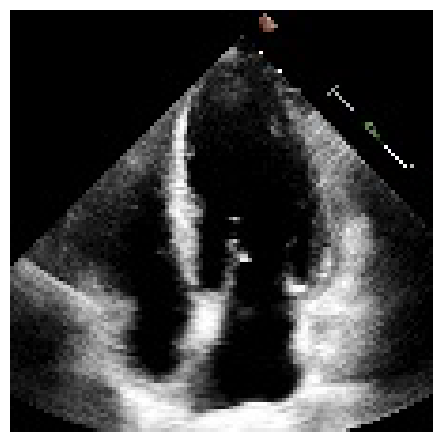

In [7]:
sample_image = f"{images_path}/{os.listdir(images_path)[0]}"
visualization.show_image_from_path(sample_image)

# Get Masks


In [8]:
files = os.listdir(images_path)

mask = Mask(
    file_info=frame_info,
    amount_of_frames=2,
    images_files_array=files,
    files_path=images_path,
)

# mask.generate_masks(action="show")
mask.generate_masks(action="save")

IMAGE SAVING DONE!


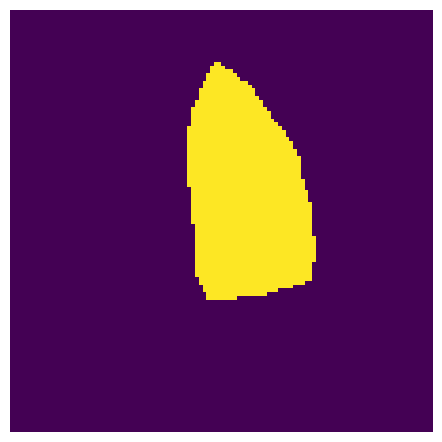

In [9]:
sample_mask = f"{masks_path}/{os.listdir(masks_path)[0]}"
visualization.show_image_from_path(sample_mask)

# Heatmap Generation


In [15]:
heatmap = HeatmapGeneration(frame_info=frame_info, path_masks=masks_path, path_tensors=heatmaps_path)
heatmap.heatmap(distribution="Gaussian", num_lands=7)

In [17]:
heatmap.heatmap(distribution="Euclidean", num_lands=7)

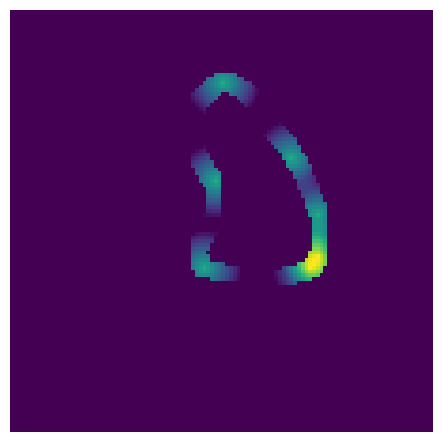

In [25]:
sample_euclidean_path = (
    f"{heatmaps_path}/euclidean/{os.listdir(f'{heatmaps_path}/euclidean')[4]}"
)
sample_euclidean_heatmap = torch.load(sample_euclidean_path)
visualization.show_n_channel_image_tensor(sample_euclidean_heatmap)

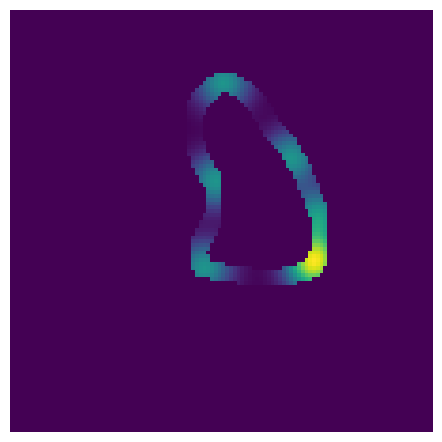

In [26]:
sample_gaussian_path = (
    f"{heatmaps_path}/gaussian/{os.listdir(f'{heatmaps_path}/gaussian')[4]}"
)
sample_gaussian_heatmap = torch.load(sample_gaussian_path)
visualization.show_n_channel_image_tensor(sample_gaussian_heatmap)